# Boxing Bout Data
In this report, we will be looking at data on boxing matches (or bouts, in the correct parlance). The dataset was obtained from [Kaggle.com](https://www.kaggle.com/slonsky/boxing-bouts), which, in turn, was scraped from boxing bout records maintained by [BoxRec.com](http://boxrec.com/en/).

## Data Description
The dataset is one table with each row representing a boxing match. It contains variables for both match participants (labeled as boxer A and boxer B) on their respective age (years), height (cms), reach (cms), weight (lbs), stance (orthodox or southpaw), career games won, career games lost, career games drawn, and career games won by knockout (kos_A and kos_B).  Each record further contains a variable for the match result, decision type (knockout, technical knockout, unanimous decision, etc.), and variables for judge's scoring for each boxer. 

In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas options set-up
pd.set_option("display.max_columns", 50)

In [2]:
# Load dataset
bouts = pd.read_csv("bouts_out_new.csv")
bouts.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [3]:
bouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [4]:
bouts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age_A,352888.0,24.416041,6.523590,-74.0,21.0,24.0,27.0,1818.0
age_B,257935.0,26.583345,11.823224,-74.0,23.0,26.0,30.0,2016.0
height_A,249246.0,172.786657,9.130127,2.0,166.0,173.0,178.0,255.0
height_B,134640.0,172.882657,9.430631,15.0,167.0,173.0,179.0,255.0
reach_A,112342.0,178.848605,12.002404,5.0,170.0,178.0,185.0,456.0
reach_B,37873.0,179.001030,14.867537,1.0,171.0,178.0,185.0,456.0
weight_A,135573.0,146.340636,30.240142,10.0,125.0,140.0,160.0,363.0
weight_B,130358.0,147.089484,30.624890,2.0,126.0,140.0,160.0,450.0
won_A,387427.0,23.108438,27.629901,0.0,5.0,14.0,31.0,332.0
won_B,387427.0,15.159080,19.938137,0.0,2.0,8.0,21.0,251.0


## Analytic Questions
### #1 What are the most common ways for a boxer to win a bout (knockout, technical knockout, judges decision, etc.)?
We start with a look at how bouts are decided.

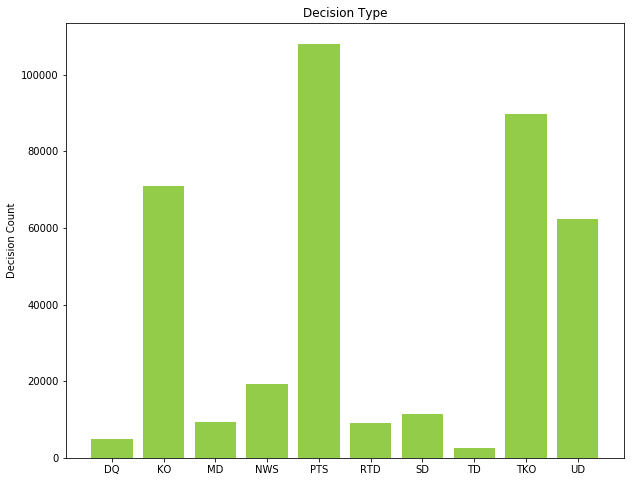

In [5]:
plt.figure(figsize=(10, 8))
plt.bar(bouts["decision"].value_counts().index, bouts["decision"].value_counts(), color="#93cc49")
plt.title("Decision Type")
plt.ylabel('Decision Count')
plt.show()

We can see that the most common decision result is PTS (win on points). Per [BoxRec](http://boxrec.com/media/index.php/BoxRec_Fight_Record_Codes), this is a generic category for a points win where it is unknown how the judges scored the match.

Overall, most boxing matches are decided by PTS, TKO (technical knockout - the referee stops the fight due to, in the referee's judgment,  a boxer not being in a fit condition to continue), KO (knockout), and UD (unanimous decision - a points win where all three judges have scored in agreement).

The remaining results are  NWS (newspaper decision - [strange and interesting](http://boxrec.com/media/index.php/Newspaper_decision)), SD (split decision - two judges score in favor of one boxer, the other judge scores in favor of the other boxer), MD (majority decision - two judges score in favor of one boxer, the other judge scores in favor of a draw), RTD (retired between rounds - basically any fight stopped between rounds when the boxer or the boxer's team refuses to continue the fight), DQ (diqulified due to rule infringment and/or excessive fouls), and TD (techincal decision - losing the fight for headbutting the other boxer).

From this, we can see that referees and judges have a substantial impact and say in the outcomes of 
boxing bouts.

### #2 How do the bout decision types breakdown by the winning boxer's stance and weight class (maybe age groups)?

First let's take a look at the win, loss, draw counts for the dataset.

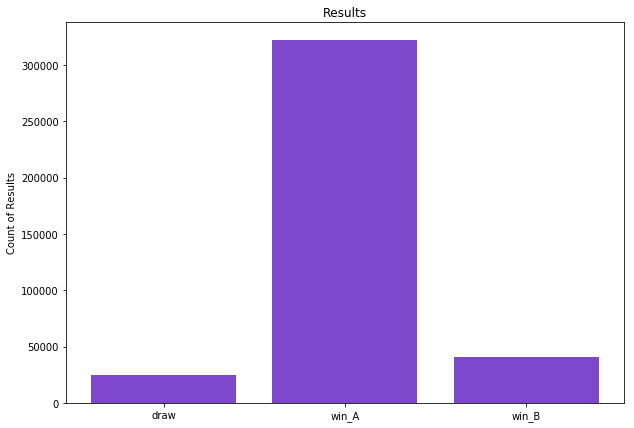

In [6]:
plt.figure(figsize=(10, 7))
plt.bar(bouts["result"].value_counts().index, bouts["result"].value_counts(), color="#7d48cc")
plt.title("Results")
plt.ylabel("Count of Results")

plt.show()

The preponderance of wins by boxer A looks suspicious. We can transform the dataset to represent individual boxers rather than bouts.

In [7]:
# Transform the dataset from bouts to boxers
# Split the dataframe into two subset dataframes (boxer A and boxer B)

# Dataframe for boxer A
bouts_A = bouts[["age_A", "height_A", "reach_A", "stance_A", "weight_A",
                 "won_A", "lost_A", "drawn_A", "kos_A", "result", "decision",
                "judge1_A", "judge2_A", "judge3_A"]]

# Dataframe for boxer B
bouts_B = bouts[["age_B", "height_B", "reach_B", "stance_B", "weight_B",
                 "won_B", "lost_B", "drawn_B", "kos_B", "result", "decision",
                "judge1_B", "judge2_B", "judge3_B"]]

# Rename the columns for each of the subset dataframes to remove the A/B distinction,
# allowing them to be concatenated together.
combined_col_names = ['age', 'height', 'reach', 'stance', 'weight', 'won', 'lost', 'drawn',
                      'kos', 'result', 'decision','judge1', 'judge2', 'judge3']

bouts_A.columns = combined_col_names
bouts_B.columns = combined_col_names

# Replace result with a variable that gives the bout outcome from the prospective individual boxer (A or B)
# Create result list for boxer A
result_list_A = []
for result in bouts_A["result"]:
    if result == "win_A":
        result_list_A.append("won")
    elif result == "win_B":
        result_list_A.append("lost")
    elif result == "draw":
        result_list_A.append("draw")

#Replace result column with data from the new result_list
bouts_A["result"] = result_list_A

# Create result list for boxer B
result_list_B = []
for result in bouts_B["result"]:
    if result == "win_B":
        result_list_B.append("won")
    elif result == "win_A":
        result_list_B.append("lost")
    elif result == "draw":
        result_list_B.append("draw")

#Replace result column with data from the new result_list
bouts_B["result"] = result_list_B
    

# Concatente the the two subset dataframes into one combined dataframe
mega_bouts = pd.concat([bouts_A, bouts_B])

# Reset the index
mega_bouts = mega_bouts.reset_index(drop=True)

mega_bouts.head()

,age,height,reach,stance,weight,won,lost,drawn,kos,result,decision,judge1,judge2,judge3
0,35.0,179.0,178.0,orthodox,160.0,37,0,0,33.0,draw,SD,110.0,115.0,114.0
1,26.0,175.0,179.0,orthodox,164.0,48,1,1,34.0,won,UD,120.0,120.0,120.0
2,28.0,176.0,NaN,orthodox,154.0,23,0,1,13.0,lost,KO,NaN,NaN,NaN
3,25.0,175.0,179.0,orthodox,155.0,46,1,1,32.0,won,KO,47.0,49.0,48.0
4,25.0,175.0,179.0,orthodox,155.0,45,1,1,32.0,won,UD,118.0,119.0,117.0


In [8]:
mega_bouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774854 entries, 0 to 774853
Data columns (total 14 columns):
age         610823 non-null float64
height      383886 non-null float64
reach       150215 non-null float64
stance      462018 non-null object
weight      265931 non-null float64
won         774854 non-null int64
lost        774854 non-null int64
drawn       774854 non-null int64
kos         774775 non-null float64
result      774854 non-null object
decision    774854 non-null object
judge1      104308 non-null float64
judge2      140403 non-null float64
judge3      122254 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 82.8+ MB


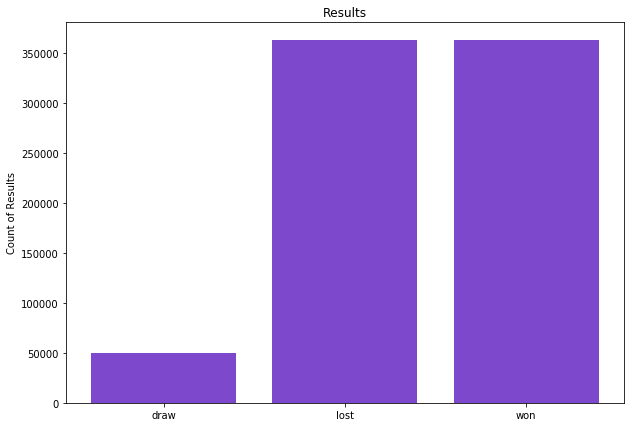

In [9]:
plt.figure(figsize=(10, 7))
plt.bar(mega_bouts["result"].value_counts().index, mega_bouts["result"].value_counts(), color="#7d48cc")
plt.title("Results")
plt.ylabel("Count of Results")

plt.show()

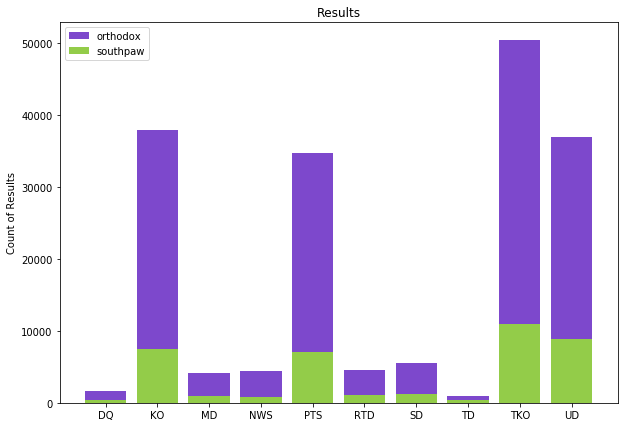

In [10]:
orthodox = mega_bouts[(mega_bouts["result"] == "won") & (mega_bouts["stance"] == "orthodox")]["decision"].value_counts()
southpaw = mega_bouts[(mega_bouts["result"] == "won") & (mega_bouts["stance"] == "southpaw")]["decision"].value_counts()

plt.figure(figsize=(10, 7))
plt.bar(orthodox.index, orthodox, color="#7d48cc", label="orthodox")
plt.bar(southpaw.index, southpaw, color="#93cc49", label="southpaw")
plt.title("Results")
plt.ylabel("Count of Results")
plt.legend()

plt.show()

In [11]:
# Add weight class variable to the mega_bouts dataframe
weight_class_list = []

for weight in mega_bouts["weight"]:
    if math.isnan(weight):
        weight_class_list.append(weight)
    else:
        if weight > 200.0:
            weight_class_list.append("Heavyweight")
        elif weight > 175.0:
            weight_class_list.append("Cruiserweight")
        elif weight > 168.0:
            weight_class_list.append("Light heavyweight")
        elif weight > 160.0:
            weight_class_list.append("Super middleweight")
        elif weight > 154.0:
            weight_class_list.append("Middleweight")
        elif weight > 147.0:
            weight_class_list.append("Light middleweight")
        elif weight > 140.0:
            weight_class_list.append("Welterweight")
        elif weight > 135.0:
            weight_class_list.append("Light welterweight")
        elif weight > 130.0:
            weight_class_list.append("Lightweight")
        elif weight > 126.0:
            weight_class_list.append("Super featherweight")
        elif weight > 122.0:
            weight_class_list.append("Featherweight")
        elif weight > 118.0:
            weight_class_list.append("Super bantamweight")
        elif weight > 115.0:
            weight_class_list.append("Bantamweight")
        elif weight > 112.0:
            weight_class_list.append("Super flyweight")
        elif weight > 108.0:
            weight_class_list.append("Flyweight")
        elif weight > 105.0:
            weight_class_list.append("Light flyweight")
        else:
            weight_class_list.append("Minimumweight")

mega_bouts["weight_class"] = weight_class_list

mega_bouts.head()

,age,height,reach,stance,weight,won,lost,drawn,kos,result,decision,judge1,judge2,judge3,weight_class
0,35.0,179.0,178.0,orthodox,160.0,37,0,0,33.0,draw,SD,110.0,115.0,114.0,Middleweight
1,26.0,175.0,179.0,orthodox,164.0,48,1,1,34.0,won,UD,120.0,120.0,120.0,Super middleweight
2,28.0,176.0,NaN,orthodox,154.0,23,0,1,13.0,lost,KO,NaN,NaN,NaN,Light middleweight
3,25.0,175.0,179.0,orthodox,155.0,46,1,1,32.0,won,KO,47.0,49.0,48.0,Middleweight
4,25.0,175.0,179.0,orthodox,155.0,45,1,1,32.0,won,UD,118.0,119.0,117.0,Middleweight


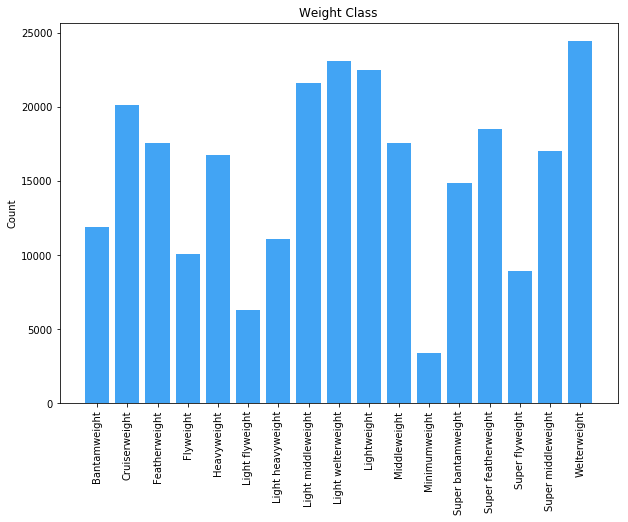

In [12]:
plt.figure(figsize=(10, 7))
plt.bar(mega_bouts["weight_class"].value_counts().index, mega_bouts["weight_class"].value_counts(), color="#42a4f4")
plt.title("Weight Class")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

### #3 Are there any correlations among age, height, reach, weight variables and the match result?


### #4 Are there any corrolations between the boxer's previous win/loss record and and the match result?

### #5 For bouts that are decided by points, are there any corrolations between the judge's scoring and the boxer's age, height, reach, weight? (Might there be a judging bias?)